In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [50]:
# 1. Import and store the data in a data frame.
# Assigning new, compressed names to the columns 
colnames=['CityFrom','CityTo','AvgFare','Distance','AvgWeekPsgrs',
          'MktLeadArLn','MktShare','AvgFareLead','LowPriceArLn','MktShareLow','Price'] 

# Reading the data
air_df = pd.read_fwf('http://users.stat.ufl.edu/~winner/data/airq402.dat', names=colnames)

In [51]:
air_df.head()

,CityFrom,CityTo,AvgFare,Distance,AvgWeekPsgrs,MktLeadArLn,MktShare,AvgFareLead,LowPriceArLn,MktShareLow,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [52]:
# EDA -- no missing values.
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
CityFrom        1000 non-null object
CityTo          1000 non-null object
AvgFare         1000 non-null float64
Distance        1000 non-null int64
AvgWeekPsgrs    1000 non-null float64
MktLeadArLn     1000 non-null object
MktShare        1000 non-null float64
AvgFareLead     1000 non-null float64
LowPriceArLn    1000 non-null object
MktShareLow     1000 non-null float64
Price           1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [53]:
# First converting non numeric values to numneric using label encoder.
air_encoded = air_df.apply(LabelEncoder().fit_transform)
air_encoded.head()

,CityFrom,CityTo,AvgFare,Distance,AvgWeekPsgrs,MktLeadArLn,MktShare,AvgFareLead,LowPriceArLn,MktShareLow,Price
0,16,0,189,174,451,6,634,179,8,782,225
1,16,40,223,344,253,6,703,235,6,315,287
2,2,0,814,341,107,4,759,809,5,55,714
3,2,7,8,49,598,14,898,15,17,891,19
4,2,52,473,282,310,12,156,483,17,271,547


In [54]:
# 2. Remove the outliers from the data 
#air_encoded[(np.abs(stats.zscore(air_encoded)) < 3).all(axis=1)]

Q1 = air_encoded.quantile(0.25)
Q3 = air_encoded.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


CityFrom         41.25
CityTo           39.00
AvgFare         482.50
Distance        366.50
AvgWeekPsgrs    460.50
MktLeadArLn      10.25
MktShare        454.25
AvgFareLead     483.50
LowPriceArLn     10.00
MktShareLow     463.50
Price           479.50
dtype: float64


In [55]:
air_encoded_out = air_encoded[~((air_encoded < (Q1 - 1.5 * IQR)) |(air_encoded > (Q3 + 1.5 * IQR))).any(axis=1)]
air_encoded_out.shape

(1000, 11)

In [56]:
# 3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.
Y = air_encoded_out.iloc[:,2:3]
Y.head()

,AvgFare
0,189
1,223
2,814
3,8
4,473


In [57]:
# 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (AvgFare)

In [58]:
# Findind the correlation
air_encoded_out.corr() 

,CityFrom,CityTo,AvgFare,Distance,AvgWeekPsgrs,MktLeadArLn,MktShare,AvgFareLead,LowPriceArLn,MktShareLow,Price
CityFrom,1.000000,0.276958,-0.084917,0.036476,0.045488,0.066125,-0.088871,-0.102698,0.041923,0.103978,-0.041330
CityTo,0.276958,1.000000,-0.042137,0.124603,-0.042472,-0.005298,-0.061804,-0.054237,0.023787,0.064640,0.033860
AvgFare,-0.084917,-0.042137,1.000000,0.600296,-0.207134,-0.341736,-0.228626,0.982980,-0.179170,-0.452681,0.866764
Distance,0.036476,0.124603,0.600296,1.000000,-0.128007,-0.202996,-0.523976,0.576560,-0.216592,-0.351627,0.624491
AvgWeekPsgrs,0.045488,-0.042472,-0.207134,-0.128007,1.000000,0.023787,0.015964,-0.182261,0.076418,0.121770,-0.230037
MktLeadArLn,0.066125,-0.005298,-0.341736,-0.202996,0.023787,1.000000,0.113542,-0.327579,0.286009,0.150175,-0.315573
MktShare,-0.088871,-0.061804,-0.228626,-0.523976,0.015964,0.113542,1.000000,-0.220440,0.147784,0.095483,-0.316519
AvgFareLead,-0.102698,-0.054237,0.982980,0.576560,-0.182261,-0.327579,-0.220440,1.000000,-0.175575,-0.483206,0.834988
LowPriceArLn,0.041923,0.023787,-0.179170,-0.216592,0.076418,0.286009,0.147784,-0.175575,1.000000,0.179543,-0.225388
MktShareLow,0.103978,0.064640,-0.452681,-0.351627,0.121770,0.150175,0.095483,-0.483206,0.179543,1.000000,-0.204884


In [59]:
# Independent variables having less than 0.1 corelation with AvgFare are AvgWeekPsgrs, MktShare, MktShareLow
# So we will drop these now.

air_encoded_out = air_encoded_out.drop(['AvgWeekPsgrs'], axis=1)
air_encoded_out = air_encoded_out.drop(['MktShare'], axis=1)
air_encoded_out = air_encoded_out.drop(['MktShareLow'], axis=1)
air_encoded_out.head()

,CityFrom,CityTo,AvgFare,Distance,MktLeadArLn,AvgFareLead,LowPriceArLn,Price
0,16,0,189,174,6,179,8,225
1,16,40,223,344,6,235,6,287
2,2,0,814,341,4,809,5,714
3,2,7,8,49,14,15,17,19
4,2,52,473,282,12,483,17,547


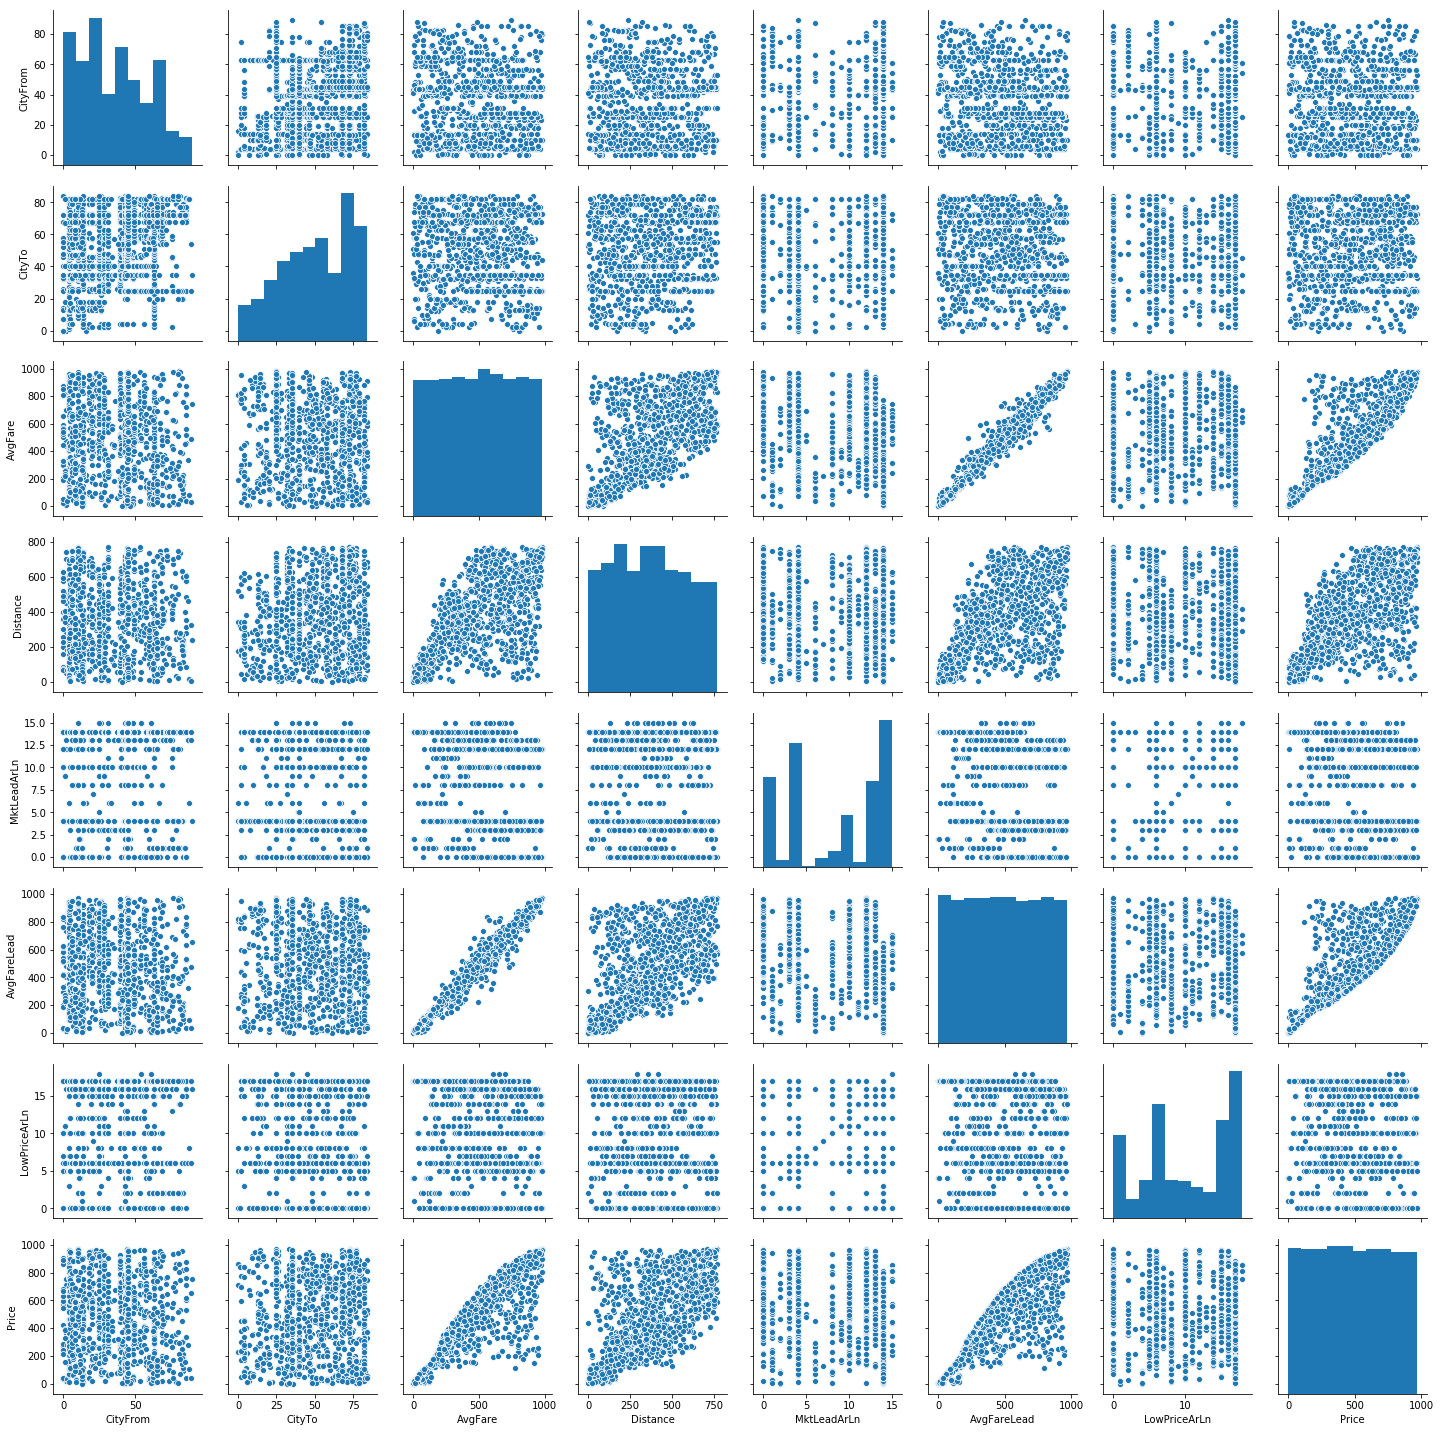

In [60]:
# 5. Create scatter Plot of Independent Variable vs Dependent Variable(AvgFare).

sns.pairplot(air_encoded_out);

In [61]:
# 6 Divide the data set into training and test data set and build a Multiple Linear Regression model.

# Removing dependent variable(AvgFare) from the main data frame 
X = air_encoded_out.drop(['AvgFare'], axis=1)
X.head()

,CityFrom,CityTo,Distance,MktLeadArLn,AvgFareLead,LowPriceArLn,Price
0,16,0,174,6,179,8,225
1,16,40,344,6,235,6,287
2,2,0,341,4,809,5,714
3,2,7,49,14,15,17,19
4,2,52,282,12,483,17,547


In [62]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=0) #80/20 split


In [63]:
x_train.shape, y_train.shape

((800, 7), (800, 1))

In [64]:
x_test.shape, y_test.shape

((200, 7), (200, 1))

In [66]:
# 7. Print the coefficients & intercepts of the linear regression model 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for CityFrom is 0.08943889846214821
The coefficient for CityTo is -0.13808266152585105
The coefficient for Distance is 0.035391205088508945
The coefficient for MktLeadArLn is -0.8120903887678501
The coefficient for AvgFareLead is 0.851404864542389
The coefficient for LowPriceArLn is 0.7587632016836336
The coefficient for Price is 0.14074313142857225


In [68]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.7030406456312903


In [74]:
# 8 Print the accuracy of the overall model 

accuracy= regression_model.score(x_test, y_test)
print(accuracy*100,'%')

96.64298446199554 %


In [75]:
y_pred = regression_model.predict(x_test)

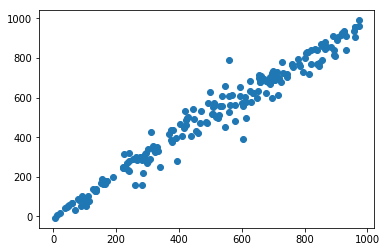

In [76]:
# importing ploting libraries
import matplotlib.pyplot as plt   

plt.scatter(y_test, y_pred)